In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [15]:
data = pd.read_json('../books_pre.json')
col = data.pop('price')
data['price'] = col

In [16]:
data.drop(['subcategory', 'main_category'], axis=1, inplace=True)
data

,binding_type,area,price
0,0,32944.80,629
1,0,81200.00,742
2,0,29680.00,673
3,0,69440.00,891
4,0,46436.00,2673
...,...,...,...
15884,0,39520.00,770
15885,0,85540.00,1320
15886,0,68664.75,1100
15887,0,50232.00,770


In [17]:
data = ((data - data.min()) / (data.max() - data.min())) * 4 + 1

In [18]:
data.describe()

,binding_type,area,price
count,15889.000000,15889.000000,15889.000000
mean,2.067405,1.230880,1.191857
std,1.769312,0.206772,0.174426
min,1.000000,1.000000,1.000000
25%,1.000000,1.107074,1.109599
50%,1.000000,1.190248,1.153067
75%,5.000000,1.289398,1.217341
max,5.000000,5.000000,5.000000


In [19]:
data.head()

,binding_type,area,price
0,1.0,1.100059,1.104398
1,1.0,1.246914,1.125389
2,1.0,1.090123,1.112571
3,1.0,1.211125,1.153067
4,1.0,1.141117,1.484094


In [39]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2, axis=1))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1-x2), axis=1)

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2), axis=1)

In [40]:
# dist = centroids.apply(lambda x: euclidean_distance(data, x))
# labels = dist.idxmin(axis=1)

In [41]:
# labels.value_counts()

In [61]:
max_iterations = 100
k = 4
centroids = np.random.randint(1, 6, size=(k, data.shape[1]))
centroids = pd.DataFrame(centroids, columns=data.columns).T

old_centroids = pd.DataFrame()
iteration = 1

In [62]:
centroids

,0,1,2,3
binding_type,3,3,2,3
area,3,1,3,2
price,3,1,3,1


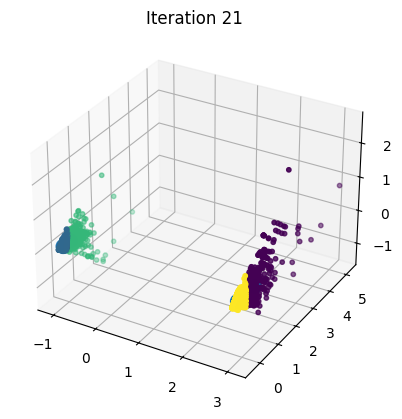

In [63]:
for i in range(max_iterations):
    if centroids.equals(old_centroids):
        break
    old_centroids = centroids
    dist = centroids.apply(lambda x: euclidean_distance(data, x))
    labels = dist.idxmin(axis=1)
    centroids = data.groupby(labels).apply(lambda x: x.mean()).T
    pca = PCA(n_components=3)
    pca_data = pca.fit_transform(data)
    pca_centroids = pca.transform(centroids.T)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = pca_data[:, 0]
    y = pca_data[:, 1]
    z = pca_data[:, 2]
    clear_output(wait=True)
    
    ax.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s=100, alpha=1)
    ax.scatter(x, y, z, marker='o', c=labels, s=10)
    plt.title(f'Iteration {i}')
    plt.show()

In [57]:
centroids

,0,1,2,3
binding_type,5.000000,1.000000,1.000000,5.000000
area,1.837293,1.172405,1.489650,1.187939
price,1.794263,1.133256,1.308893,1.214531
